In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers.advanced_activations import LeakyReLU
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import os

/Users/LlewelynRW/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.


In [2]:
cwd = os.getcwd()
url = cwd + "/ResidentialSales Lynmore_built.xls"
cols = [7,8,9,11,15,16,17,19]
df = pd.read_excel(url,
                                sheet_name=0,#ResidentialSales Lynmore
                                header=0,
                                usecols=cols)
df.head()

,List Price,Sale Price,List Date,Unconditional Date,Bedrooms,Land Area,Floor Area,Valuation
0,309000.0,300000,2002-11-03,2005-12-31,3,809.0,NaN,240000.0
1,379000.0,368750,2007-03-21,2007-05-22,3,1072.0,90.0,NaN
2,249000.0,243000,2006-04-04,2006-04-18,3,1012.0,NaN,275000.0
3,NaN,245000,2005-11-02,2005-12-01,3,948.0,100.0,NaN
4,299000.0,278000,2006-05-28,2006-07-27,3,614.0,NaN,230000.0


In [3]:
df.corr()

,List Price,Sale Price,Bedrooms,Land Area,Floor Area,Valuation
List Price,1.000000,0.983644,0.477168,0.242549,0.514712,0.707552
Sale Price,0.983644,1.000000,0.452879,0.278415,0.525891,0.740227
Bedrooms,0.477168,0.452879,1.000000,0.132738,0.473379,0.324935
Land Area,0.242549,0.278415,0.132738,1.000000,0.309685,0.362686
Floor Area,0.514712,0.525891,0.473379,0.309685,1.000000,0.519863
Valuation,0.707552,0.740227,0.324935,0.362686,0.519863,1.000000


In [4]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f4e52b0>,
      dtype=object)

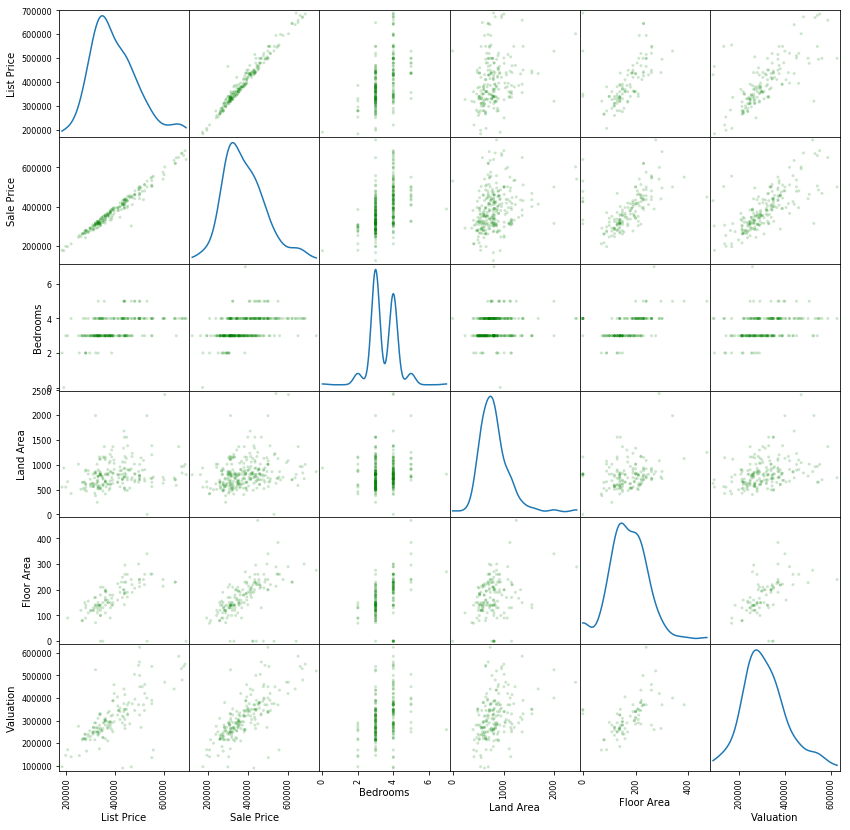

In [5]:
scatter_matrix(df.iloc[:,:], alpha=0.2, figsize=(14, 14), diagonal='kde',color='g')

In [6]:
df.fillna(df.median(),inplace=True)

,List Price,Sale Price,List Date,Unconditional Date,Bedrooms,Land Area,Floor Area,Valuation
0,309000.0,300000,2002-11-03,2005-12-31,3,809.0,170.0,240000.0
1,379000.0,368750,2007-03-21,2007-05-22,3,1072.0,90.0,297500.0
2,249000.0,243000,2006-04-04,2006-04-18,3,1012.0,170.0,275000.0
3,379000.0,245000,2005-11-02,2005-12-01,3,948.0,100.0,297500.0
4,299000.0,278000,2006-05-28,2006-07-27,3,614.0,170.0,230000.0
5,379000.0,287500,2006-07-31,2006-10-19,3,731.0,137.0,260000.0
6,465000.0,301000,2005-08-18,2005-10-03,4,700.0,170.0,95000.0
7,370000.0,355000,2006-03-17,2006-03-24,3,829.0,150.0,280000.0
8,379000.0,385000,2005-12-19,2006-01-01,4,717.0,170.0,340000.0
9,390000.0,390000,2007-04-13,2007-12-06,3,829.0,170.0,388000.0


In [7]:
X = df.values[:,[0,4,5,6,7]].astype(float)
Y = df.values[:,1].astype(float)     

You need to convert the above arrays using ```.astype(float)```. Otherwise, X is just a pandas object. Sigh. 

In [8]:
#Using OLS model
import statsmodels.api as sm
model = sm.OLS(Y.astype(float) ,X.astype(float))
results = model.fit(missing='drop')
results.summary()

/Users/LlewelynRW/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     2817.
Date:                Sat, 24 Mar 2018   Prob (F-statistic):          1.08e-237
Time:                        13:36:18   Log-Likelihood:                -3530.8
No. Observations:                 286   AIC:                             7072.
Df Residuals:                     281   BIC:                             7090.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6627      0.044     14.967      0.000       0.576       0.750
x2          2618.8262   4709.859      0.556      0.579   -6652.259    1.19e+04
x3             1.7589     12.040      0.146      0.884     -21.941      25.459
x4           219.4452     66.420      3.304      0.001      88.700     350.190
x5             0.2519      0.049      5.171      0.000       0.156       0.348
==============================================================================
Omnibus:                       78.784   Durbin-Watson:                   1.481
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              505.126
Skew:                           0.934   Prob(JB):                    2.06e-110
Kurtosis:                       9.237   Cond. No.                     7.25e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
df.columns[[0,4,5,6,7]] 

Index(['List Price', 'Bedrooms', 'Land Area', 'Floor Area', 'Valuation'], dtype='object')

In [10]:
model2 = sm.OLS(Y.astype(float) ,X[:,[0,4]].astype(float))
results2 = model2.fit(missing='drop')
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     6711.
Date:                Sat, 24 Mar 2018   Prob (F-statistic):          8.43e-240
Time:                        13:36:24   Log-Likelihood:                -3539.0
No. Observations:                 286   AIC:                             7082.
Df Residuals:                     284   BIC:                             7089.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7409      0.036     20.601      0.000       0.670       0.812
x2             0.3030      0.046      6.658      0.000       0.213       0.393
==============================================================================
Omnibus:                       91.350   Durbin-Watson:                   1.610
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              668.933
Skew:                           1.078   Prob(JB):                    5.54e-146
Kurtosis:                      10.175   Cond. No.                         8.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Looking at list -v- valuation, it seems that sale price is about 75% of list price, plus ~20% of valuation. So, for an example of listing 730k, value 685k ->  $669k.

In [17]:
import pymc3 as pm
import theano
x_shared = theano.shared(X)
y_shared = theano.shared(Y)

In [18]:
with pm.Model() as mdl_ols:
    b0 = pm.Normal('b0', mu=0, sd=100)
    b1 = pm.Normal('b1', mu=0, sd=100)
    b2 = pm.Normal('b2', mu=0, sd=100)
    b3 = pm.Normal('b3', mu=0, sd=100)
    b4 = pm.Normal('b4', mu=0, sd=100)
    b5 = pm.Normal('b5', mu=0, sd=100)
#     yest = pm.Deterministic('y_est',b0 + b1 * x_shared[:,0] + b2*x_shared[:,1]+b3*x_shared[:,2] +b4*x_shared[:,3]+b5*x_shared[:,4])
    yest = b0 + b1 * x_shared[:,0] + b2*x_shared[:,1]+b3*x_shared[:,2] +b4*x_shared[:,3]+b5*x_shared[:,4]
    sigma_y = pm.HalfCauchy('sigma_y', beta=10)
    likelihood = pm.Normal('likelihood', mu=yest, sd=sigma_y, observed=y_shared)
    traces_ols = pm.sample(10000,step=pm.Metropolis())

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [sigma_y_log__]
>Metropolis: [b5]
>Metropolis: [b4]
>Metropolis: [b3]
>Metropolis: [b2]
>Metropolis: [b1]
>Metropolis: [b0]
100%|██████████| 10500/10500 [00:10<00:00, 1011.39it/s]
The estimated number of effective samples is smaller than 200 for some parameters.


In [19]:
pm.summary(traces_ols)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
b0,-0.814139,100.428551,1.025454,-207.945389,186.878616,8026.0,1.000190
b1,0.691055,0.044137,0.002978,0.615014,0.777061,149.0,1.000847
b2,2.528983,100.357643,0.998184,-194.401199,197.693863,9035.0,1.000292
b3,5.896811,11.674076,0.475302,-17.176107,28.454611,547.0,1.006174
b4,170.331787,51.728973,1.624641,69.254448,272.594147,851.0,1.004211
b5,0.259859,0.052990,0.003540,0.159299,0.352008,92.0,1.002928
sigma_y,56193.003906,2414.830078,44.100156,51336.785156,60682.496094,1465.0,1.001362


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x15c861ac8>,
      dtype=object)

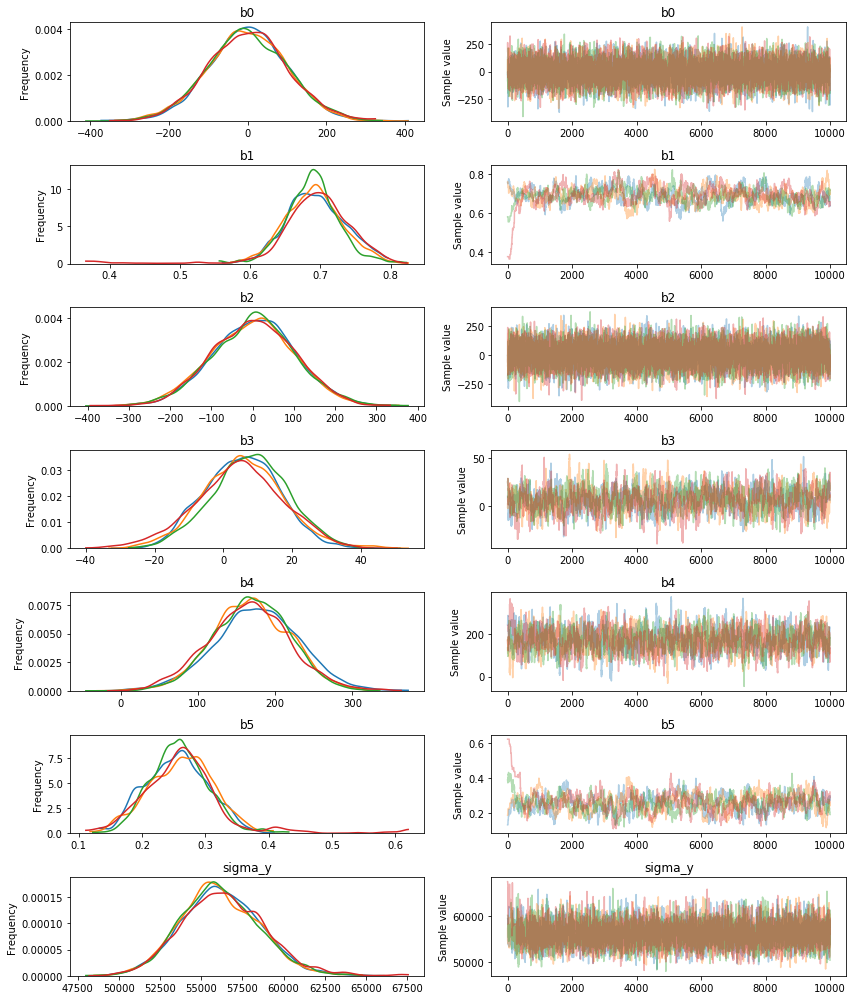

In [20]:
pm.traceplot(traces_ols)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x150b470b8>,
      dtype=object)

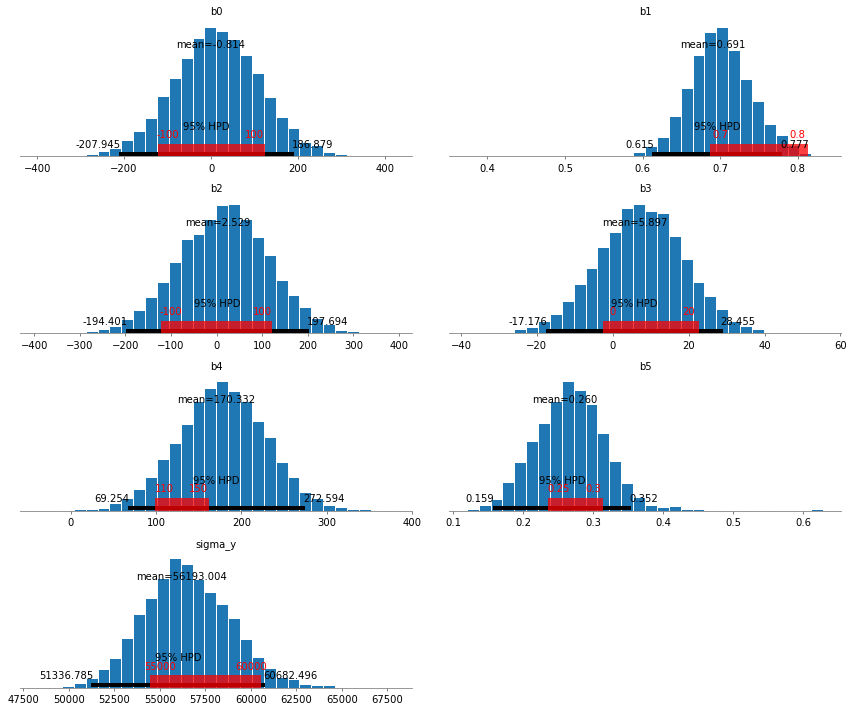

In [21]:
pm.plot_posterior(traces_ols, kde_plot=True, rope=[(-100,100),(.7,.8),(-100,100),(0,20),(110,150),(.25,.30),(55000,60000)])

In [22]:
df.columns[[0,4,5,6,7]] 

Index(['List Price', 'Bedrooms', 'Land Area', 'Floor Area', 'Valuation'], dtype='object')

In [29]:
#ppc for the original x-data
ppc = pm.sample_ppc(traces_ols,model=mdl_ols, samples=500)

100%|██████████| 500/500 [00:00<00:00, 2400.94it/s]


(array([1.19183727e-07, 7.74694227e-07, 1.72816404e-06, 3.21796063e-06,
        5.84000263e-06, 7.92571786e-06, 5.60163518e-06, 3.15836877e-06,
        1.01306168e-06, 4.17143045e-07]),
 array([559856.87154234, 593418.50024637, 626980.12895039, 660541.75765442,
        694103.38635845, 727665.01506248, 761226.6437665 , 794788.27247053,
        828349.90117456, 861911.52987859, 895473.15858261]),
 <a list of 10 Patch objects>)

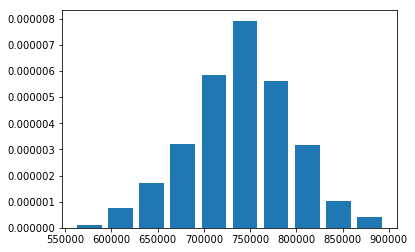

In [30]:
plt.hist(post_pred['likelihood'], rwidth=.8,normed=True)

In [31]:
x_shared.set_value(np.array([[730000, 4, 1072,280,679000]]))
y_shared.set_value([0]) # dummy values

#post prediction for new set of x-values
post_pred = pm.sample_ppc(traces_ols, model=mdl_ols, samples=500)

100%|██████████| 500/500 [00:00<00:00, 2445.60it/s]


In [33]:
pm.stats.hpd(post_pred['likelihood']),pm.stats.quantiles(post_pred['likelihood'])

(array([625210.39246646, 842735.91842837]),
 {2.5: 625210.3924664563,
  25: 699559.4318773117,
  50: 731081.6225996005,
  75: 770238.3510084802,
  97.5: 842735.9184283726})

(array([9.40959773e-07, 1.81918889e-06, 3.26199388e-06, 6.02214255e-06,
        6.77491036e-06, 5.83395059e-06, 4.20295365e-06, 1.63099694e-06,
        7.52767818e-07, 1.25461303e-07]),
 array([589414.38146239, 621296.72209689, 653179.0627314 , 685061.4033659 ,
        716943.74400041, 748826.08463492, 780708.42526942, 812590.76590393,
        844473.10653843, 876355.44717294, 908237.78780744]),
 <a list of 10 Patch objects>)

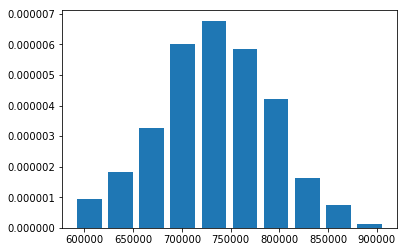

In [139]:
plt.hist(post_pred['likelihood'], rwidth=.8,normed=True)

In [140]:
x_pred = np.array([[730000, 4, 1072,280,679000]])

In [141]:
Intercept = traces_ols.get_values(traces_ols.varnames[0:6][0]).mean()
L_Price = traces_ols.get_values(traces_ols.varnames[0:6][1]).mean()
B_Room = traces_ols.get_values(traces_ols.varnames[0:6][2]).mean()
Land = traces_ols.get_values(traces_ols.varnames[0:6][3]).mean()
Floor = traces_ols.get_values(traces_ols.varnames[0:6][4]).mean()
Val = traces_ols.get_values(traces_ols.varnames[0:6][5]).mean()

In [143]:
new_y = Intercept + L_Price*x_pred[:,0] + B_Room*x_pred[:,1] + Land*x_pred[:,2] + Floor*x_pred[:,3] + Val*x_pred[:,4]
new_y

array([735498.08777523])

In [144]:
from sklearn import linear_model, metrics

In [145]:
reg = linear_model.Ridge(alpha = .5,normalize=False)

In [146]:
reg.fit(X,Y)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [147]:
reg.coef_,reg.intercept_

(array([7.26911809e-01, 1.33563555e+04, 1.39276873e+01, 2.76087364e+02,
        2.96152180e-01]), -98170.74040830712)

In [148]:
reg.predict(x_pred)

array([779222.57484303])

In [149]:
Y_pred = reg.predict(X)
metrics.r2_score(Y,Y_pred), metrics.mean_squared_error(Y,Y_pred)

(0.7364784839618768, 2835138431.1425595)

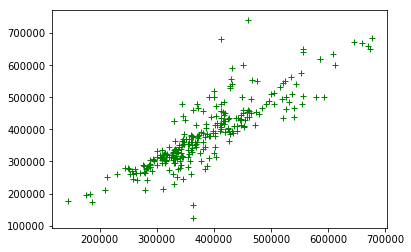

In [150]:
plt.plot(Y_pred,Y,'g+')

(array([1.34490361e-07, 0.00000000e+00, 7.39696984e-07, 2.42082649e-06,
        1.17679066e-05, 2.48807167e-06, 1.27765843e-06, 2.68980721e-07,
        0.00000000e+00, 1.34490361e-07]),
 array([-239580.17681938, -187583.83330525, -135587.48979113,
         -83591.146277  ,  -31594.80276288,   20401.54075125,
          72397.88426537,  124394.2277795 ,  176390.57129362,
         228386.91480775,  280383.25832187]),
 <a list of 10 Patch objects>)

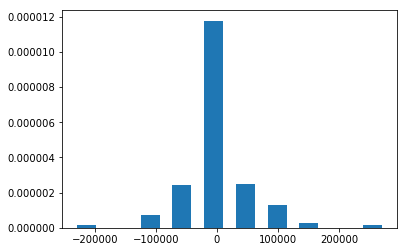

In [153]:
plt.hist(Y-Y_pred, rwidth=.6,normed=True)